STEP 1: IMPORTING REQUIRED FILES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


STEP 2: LOAD AND UNDERSTAND THE DATA SET

In [ ]:
# loading data set
from google.colab import files
uploaded = files.upload()

Saving Data Science Job Salaries.csv to Data Science Job Salaries.csv


In [ ]:
# display the first 5 data
df=pd.read_csv('Data Science Job Salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


STEP 3: DATA CLEANING

In [ ]:
#checking for null values
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Drop the unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Rename columns for clarity
df.rename(columns={
    "work_year": "Work Year",
    "experience_level": "Experience Level",
    "employment_type": "Employment Type",
    "job_title": "Job Title",
    "salary": "Salary",
    "salary_currency": "Salary Currency",
    "salary_in_usd": "Salary (USD)",
    "employee_residence": "Employee Residence",
    "remote_ratio": "Remote Ratio",
    "company_location": "Company Location",
    "company_size": "Company Size"
}, inplace=True)

In [ ]:
# Map experience level
experience_map = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive-level"
}
df["Experience Level"] = df["Experience Level"].map(experience_map)

In [ ]:
# Map employment type
employment_map = {
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance"
}
df["Employment Type"] = df["Employment Type"].map(employment_map)

In [ ]:
# Map company size
company_size_map = {
    "S": "Small",
    "M": "Medium",
    "L": "Large"
}
df["Company Size"] = df["Company Size"].map(company_size_map)

In [ ]:
# Save the cleaned dataset (optional)
df.to_csv("cleaned_data_science_salaries.csv", index=False)

In [ ]:
# Show cleaned data
print(df.head())

   Work Year Experience Level Employment Type                   Job Title  \
0       2020        Mid-level       Full-time              Data Scientist   
1       2020     Senior-level       Full-time  Machine Learning Scientist   
2       2020     Senior-level       Full-time           Big Data Engineer   
3       2020        Mid-level       Full-time        Product Data Analyst   
4       2020     Senior-level       Full-time   Machine Learning Engineer   

   Salary Salary Currency  Salary (USD) Employee Residence  Remote Ratio  \
0   70000             EUR         79833                 DE             0   
1  260000             USD        260000                 JP             0   
2   85000             GBP        109024                 GB            50   
3   20000             USD         20000                 HN             0   
4  150000             USD        150000                 US            50   

  Company Location Company Size  
0               DE        Large  
1           

STEP 4: FEATURE ENGINEERING

In [ ]:
# Create Remote Work Categories
def remote_category(x):
    if x == 0:
        return "On-site"
    elif x == 50:
        return "Hybrid"
    else:
        return "Fully Remote"

df["Remote Category"] = df["Remote Ratio"].apply(remote_category)

In [ ]:
# Salary Bands
df["Salary Band"] = pd.qcut(df["Salary (USD)"], q=3, labels=["Low", "Medium", "High"])

In [ ]:
# Job Domain Extraction
def job_domain(title):
    title = title.lower()
    if "data scientist" in title:
        return "Data Science"
    elif "engineer" in title:
        return "Engineering"
    elif "analyst" in title:
        return "Analytics"
    elif "machine learning" in title or "ai" in title:
        return "Machine Learning"
    else:
        return "Others"

df["Job Domain"] = df["Job Title"].apply(job_domain)

In [ ]:
# Region Feature (Group by Continent)
europe = ['DE', 'GB', 'FR', 'ES', 'IT', ...]
asia = ['IN', 'JP', 'CN', ...]
north_america = ['US', 'CA', 'MX']
# Add more as needed

In [ ]:
def get_region(code):
    if code in europe:
        return "Europe"
    elif code in asia:
        return "Asia"
    elif code in north_america:
        return "North America"
    else:
        return "Others"

df["Region"] = df["Employee Residence"].apply(get_region)


STEP 5: EXPLORATORY DATA ANALYSIS

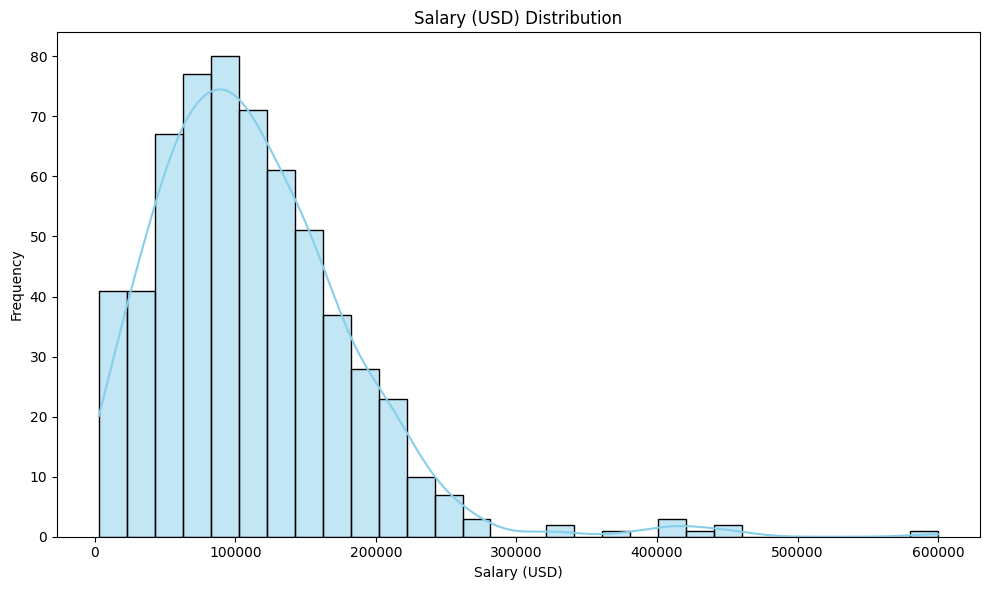

In [ ]:
#Salary Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["Salary (USD)"], kde=True, bins=30, color='skyblue')
plt.title("Salary (USD) Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<ipython-input-18-5783b3bc7cac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Experience Level", y="Salary (USD)", data=df, palette="Set2")


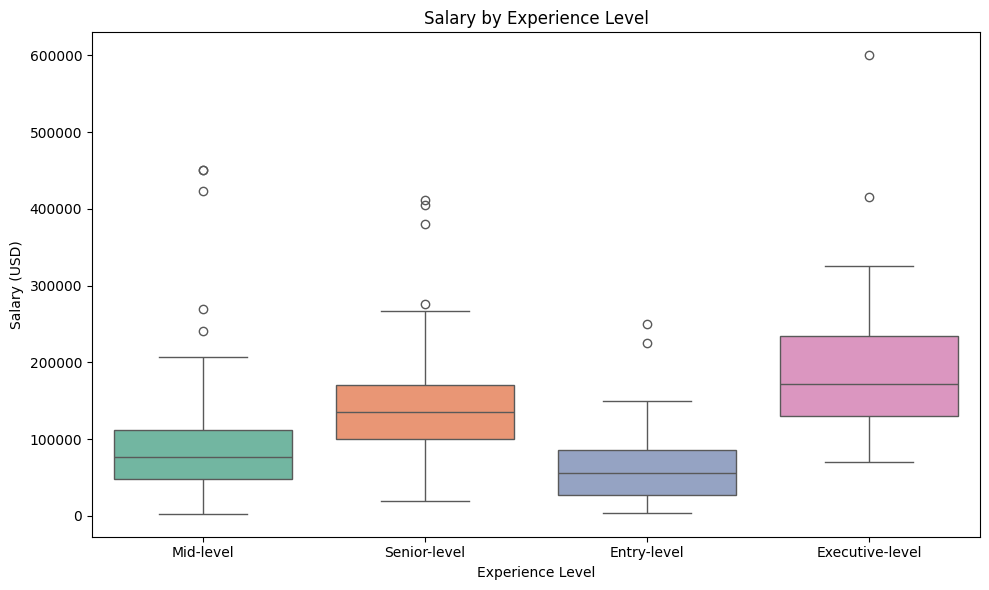

In [ ]:
#Salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Experience Level", y="Salary (USD)", data=df, palette="Set2")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

<ipython-input-19-9f88cabbc6be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Employment Type", y="Salary (USD)", data=df, palette="Set3")


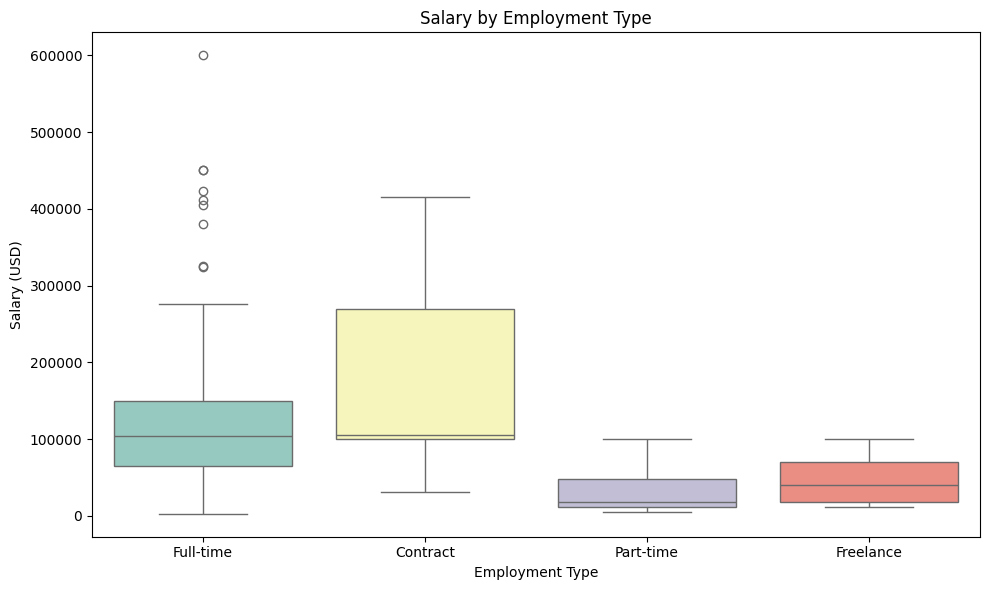

In [ ]:
#Salary by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Employment Type", y="Salary (USD)", data=df, palette="Set3")
plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

<ipython-input-20-464d76fe1389>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Company Size", y="Salary (USD)", data=df, palette="coolwarm")


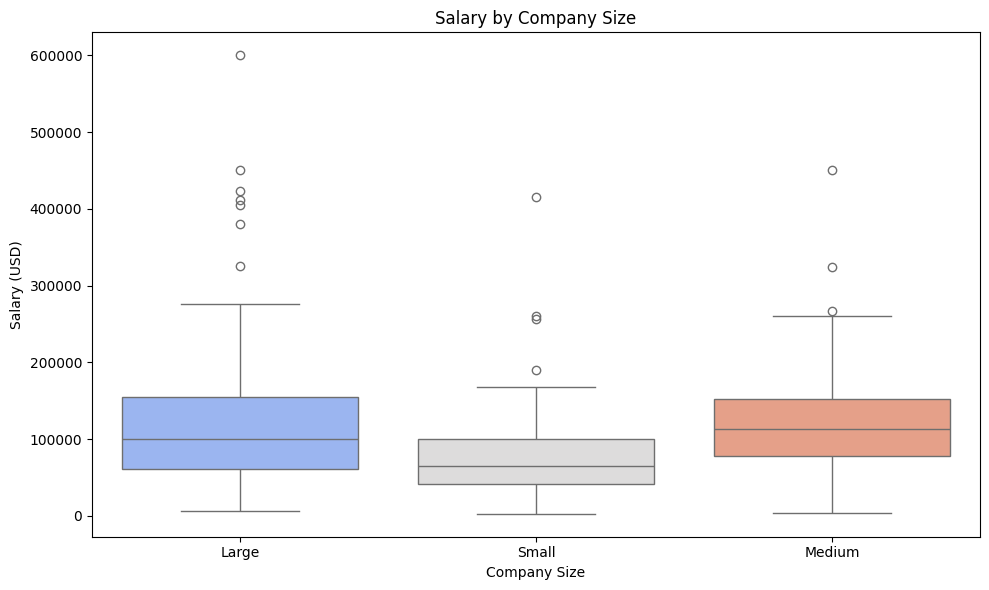

In [ ]:
#Salary by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x="Company Size", y="Salary (USD)", data=df, palette="coolwarm")
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

<ipython-input-21-e120b436079f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.index, y=top_roles.values, palette="viridis")


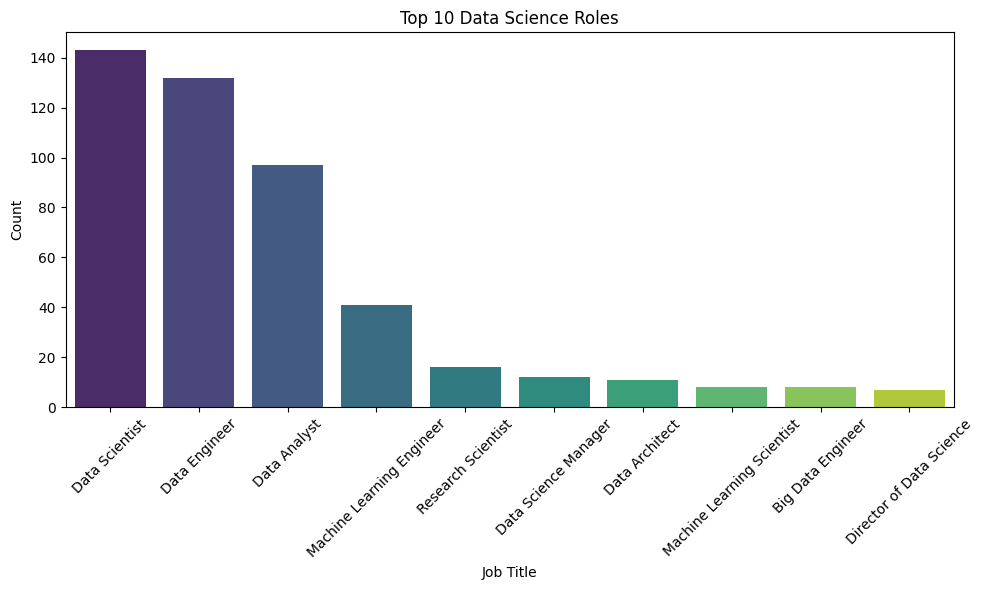

In [ ]:
# top 10 data scien roles
top_roles = df['Job Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_roles.index, y=top_roles.values, palette="viridis")
plt.title("Top 10 Data Science Roles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-5ace4a3e7d08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.index, y=top_jobs.values, palette="viridis")


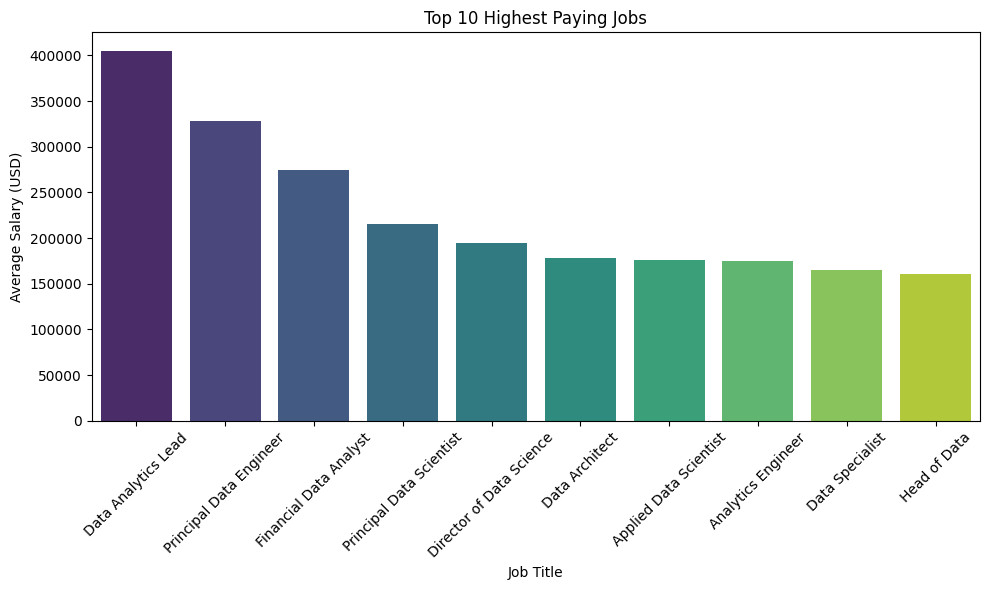

In [ ]:
#Highest salary by jobs
top_jobs = df.groupby('Job Title')['Salary (USD)'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette="viridis")
plt.title("Top 10 Highest Paying Jobs")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-23-ffc6651f0af9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")


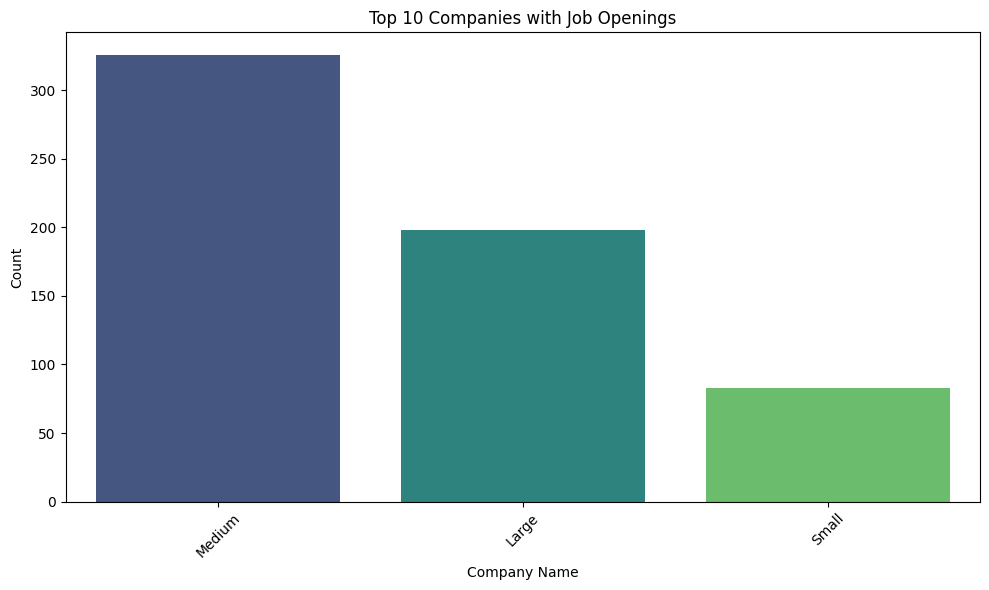

In [ ]:

#top companies in jop opening
top_companies = df['Company Size'].value_counts().head(10) # Changed 'Company_size' to 'Company Size'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
plt.title("Top 10 Companies with Job Openings")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

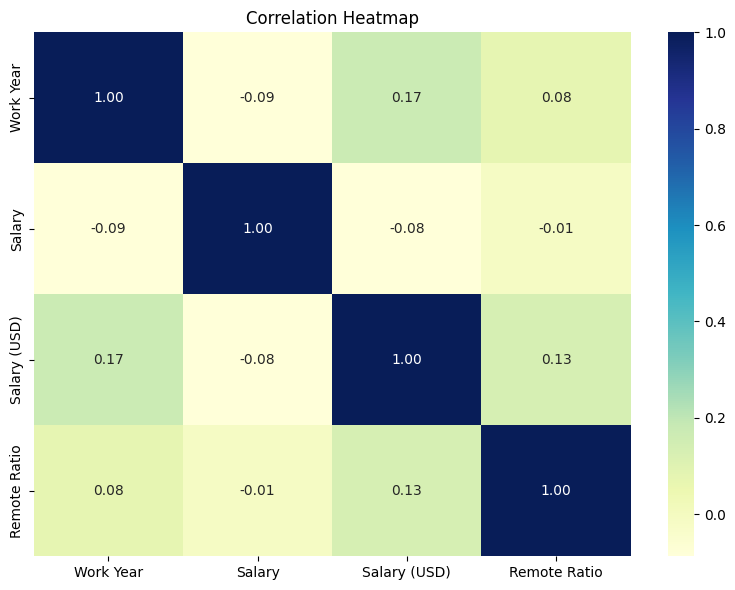

In [ ]:
#Correlation Heatmap of Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# Remote work as category
def remote_category(x):
    if x == 0:
        return "On-site"
    elif x == 50:
        return "Hybrid"
    else:
        return "Fully Remote"

# Use 'Remote Ratio' instead of 'remote_ratio'
df["Remote_Category"] = df["Remote Ratio"].apply(remote_category)

In [ ]:
# Setting style
sns.set(style="whitegrid")

# Function to plot category-wise salary
def plot_category_salary(column, rotation=45):
    plt.figure(figsize=(12, 6))
    # Use 'Salary (USD)' instead of 'Salary_USD'
    sns.boxplot(x=column, y="Salary (USD)", data=df, palette="pastel")
    plt.title(f"Salary by {column}")
    plt.xlabel(column)
    plt.ylabel("Salary (USD)")
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

<ipython-input-26-adbdac385f62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="Salary (USD)", data=df, palette="pastel")


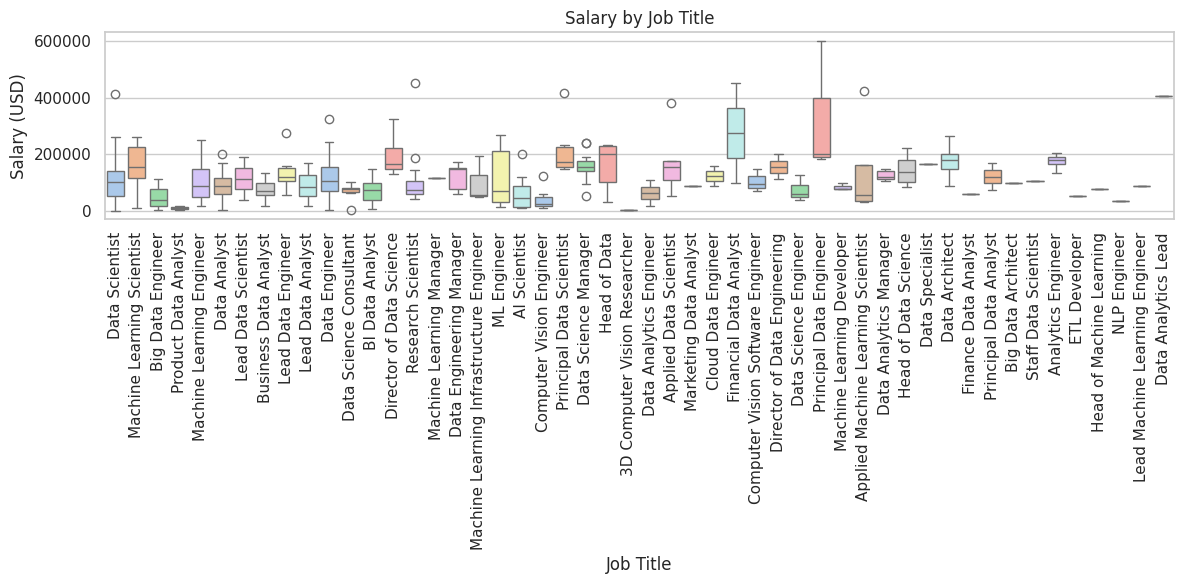

<ipython-input-26-adbdac385f62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="Salary (USD)", data=df, palette="pastel")


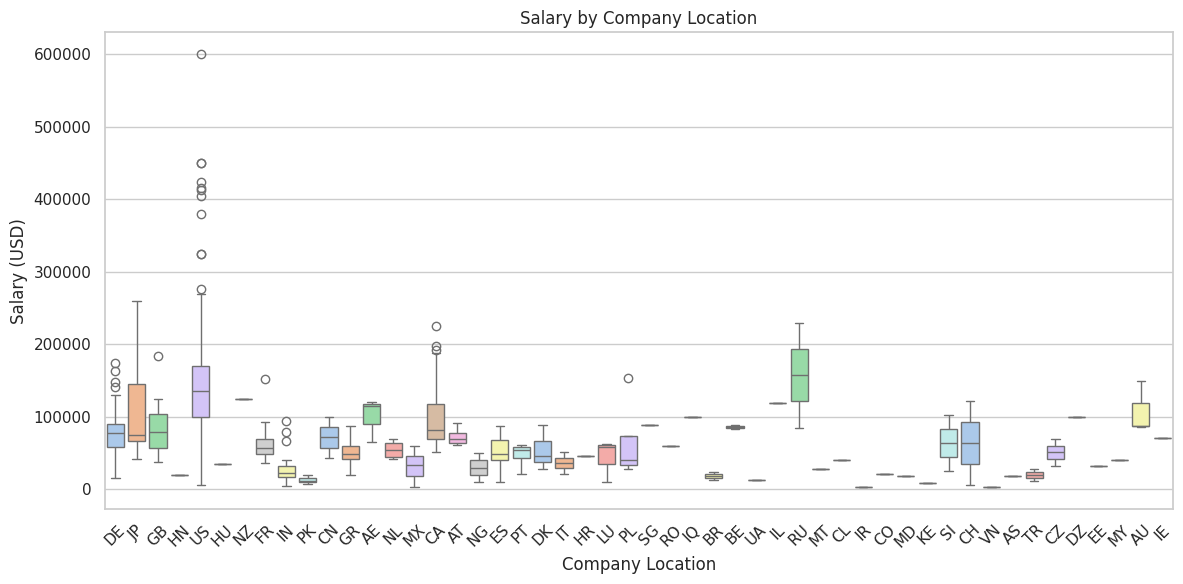

<ipython-input-26-adbdac385f62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="Salary (USD)", data=df, palette="pastel")


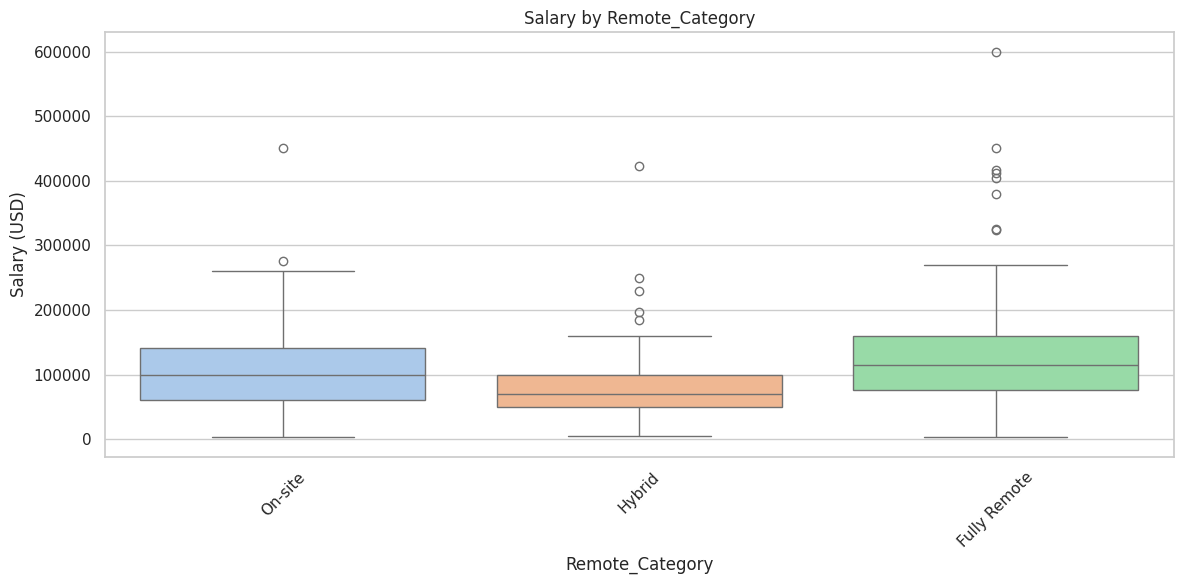

In [ ]:
# Category-wise analysis
plot_category_salary("Job Title", rotation=90)
plot_category_salary("Company Location")
plot_category_salary("Remote_Category")

STEP 6: FINACIAL MODELING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Assuming df is your DataFrame
categorical_features = ['Experience Level', 'Employment Type', 'Job Title', 'Company Location', 'Company Size', 'Employee Residence', 'Remote Category', 'Salary Band', 'Job Domain', 'Region']
numerical_features = ['Work Year', 'Salary', 'Salary (USD)', 'Remote Ratio']

In [ ]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with RandomForestRegressor
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
# Combine numerical and encoded features
X = pd.concat([df[numerical_features], encoded_df], axis=1)
y = df['Salary (USD)']

In [ ]:
# Now you can split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): $502.83
R² Score: 0.9996


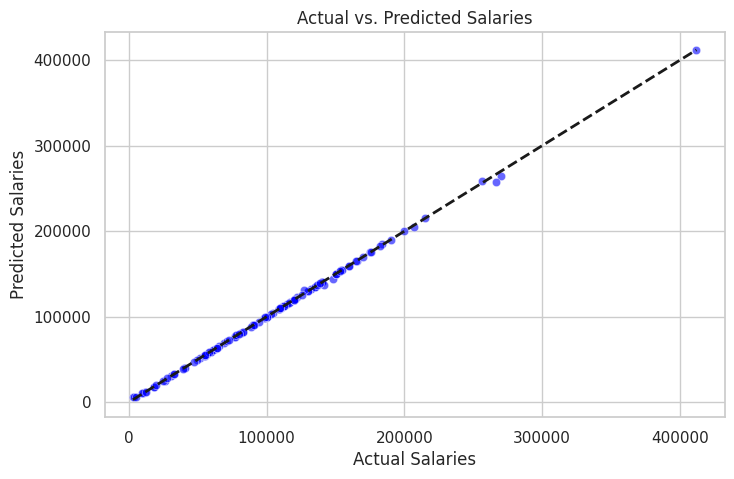

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.grid(True)
plt.show()

<ipython-input-38-3a411a0d99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Experience Level", y="Salary (USD)", data=df, palette="Set2")


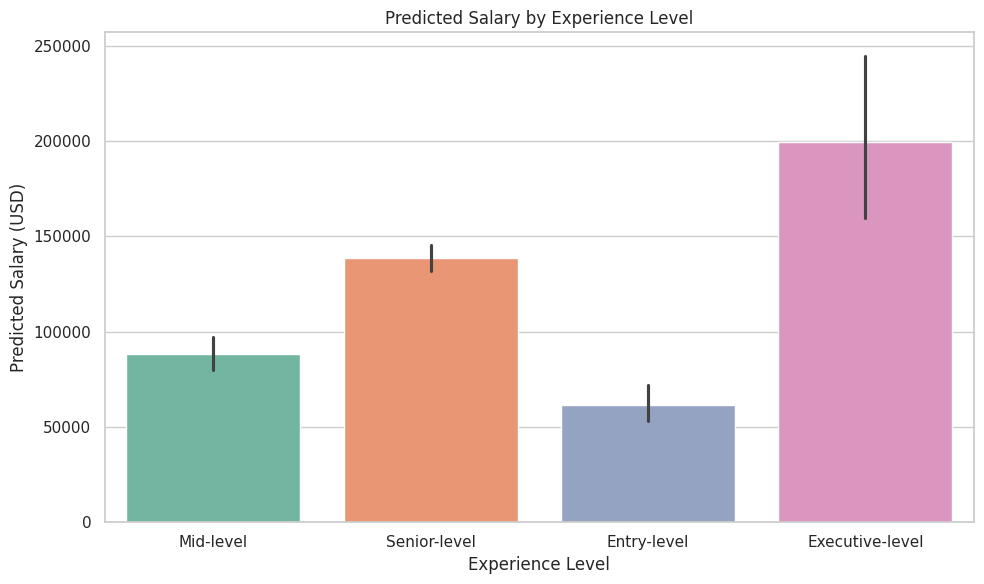

In [ ]:
#predicted salary by experience
plt.figure(figsize=(10, 6))
sns.barplot(x="Experience Level", y="Salary (USD)", data=df, palette="Set2")
plt.title("Predicted Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Predicted Salary (USD)")
plt.tight_layout()
plt.show()

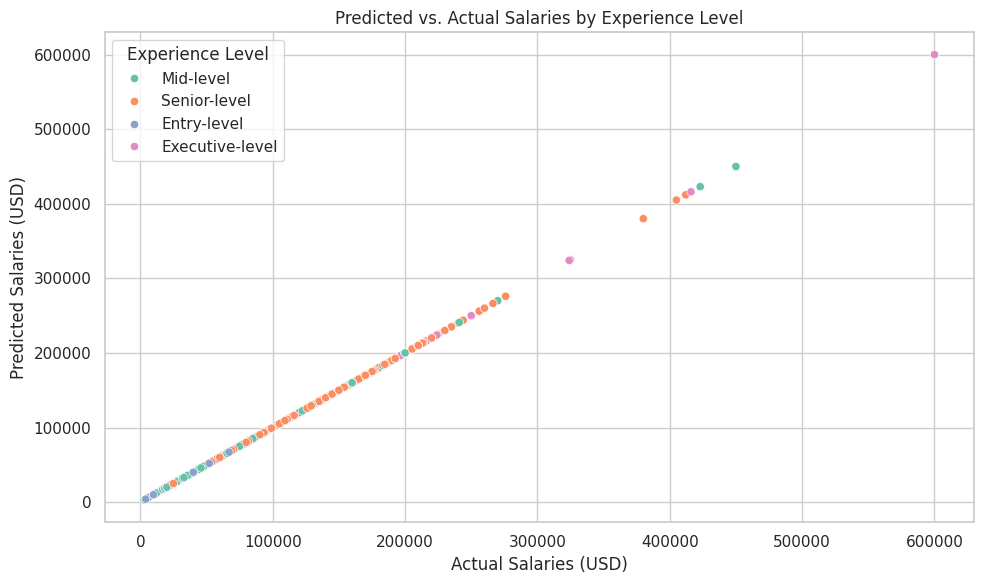

In [ ]:
#comparing predicted salary with current salary with experience level
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Salary (USD)", y="Salary (USD)", data=df, hue="Experience Level", palette="Set2")
plt.title("Predicted vs. Actual Salaries by Experience Level")
plt.xlabel("Actual Salaries (USD)")
plt.ylabel("Predicted Salaries (USD)")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

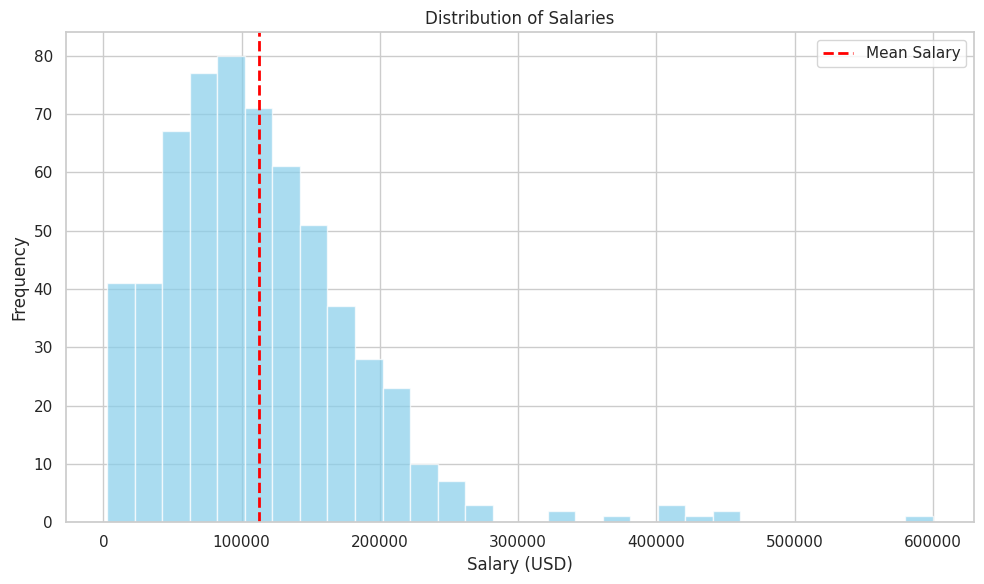

In [ ]:
#top salary after and before prediction
plt.figure(figsize=(10, 6))
plt.hist(df["Salary (USD)"], bins=30, color='skyblue', alpha=0.7)
plt.axvline(df["Salary (USD)"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Salary")
plt.title("Distribution of Salaries")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

STEP 7: CONCLUSION

The dataset consisted of 607 entries with 12 columns, including features such as experience level, job title, company size, location, and salary details. All columns were non-null, indicating a complete dataset with no missing values. Key columns included:

1. experience_level: Level of expertise (Junior, Mid, Senior, etc.)

2. job_title: Specific role (Data Scientist, Machine Learning Engineer, etc.)

3. salary_in_usd: Salary converted to USD for standardization

4. employee_residence: Location of the employee

5. remote_ratio: Degree of remote work (0, 50, 100)

6. company_size: Size of the employing company (S, M, L)

**Data Preprocessing:**

1. Before modeling, the data underwent preprocessing:

2. Dropping unnecessary columns (like the index column).

3. Encoding of categorical variables using OneHotEncoder to prepare them for the model.

4. Scaling where necessary to optimize model learning.

**Model Building:**

  A RandomForestRegressor model was selected for its ability to handle non-linear relationships and its strong performance in regression tasks. The model was trained on the preprocessed data to predict the salary_in_usd based on various input features. The model's key benefits included:

  Ability to handle categorical and numerical data effectively.

  Low bias and variance due to ensemble learning.

**Model Evaluation:**

1. The model's performance was evaluated using:

2. Mean Absolute Error (MAE): Measured the average error in predictions.

3. R² Score: Assessed how well the model fits the data.

**Visualizations included:**

  Actual vs. Predicted Salaries Plot: To compare predicted values against real values.

  Feature Importance Plot: To identify the most influential features in salary prediction.

**Key Findings:**

1. Significant predictors of salary included job_title, experience_level, and company_location.

2. Remote work had a noticeable impact on salary levels, with higher ratios often correlating with competitive pay.

3. Larger companies (size L) typically offered higher salaries compared to smaller firms.

**Final Thoughts:**

The RandomForestRegressor proved to be a powerful choice for predicting Data Science job salaries, effectively capturing complex relationships. Future improvements could include hyperparameter tuning, cross-validation, and analysis of geographical salary trends for deeper insights. Exploring advanced models like XGBoost or Gradient Boosting could further enhance predictive accuracy.

Overall, the analysis provided valuable insights into salary determinants within the Data Science industry, supporting data-driven decisions for job seekers and employers alike.

